In [1]:
%matplotlib notebook

# Preliminary EDA

Preliminary EDA on the raw data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from src import data_io

# Plot styling
sns.set_style('whitegrid')
sns.set_palette('Set2')

# Prerequisites

## Data loading

In [3]:
raw = data_io.load_raw_data()

In [4]:
raw.head(15)

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
5,1010293,2016-07-10,2016-07-11,55,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
6,1010293,2016-07-12,2016-07-13,23921,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
7,1010293,2016-07-13,2016-07-15,65322,desktop,9924,The Devilfire Empire,Cobra Island,1010293_1
8,1010293,2016-07-15,2016-07-16,23921,desktop,9924,The Devilfire Empire,Cobra Island,1010293_1
9,1010293,2016-07-16,2016-07-17,20545,desktop,10573,The Devilfire Empire,Cobra Island,1010293_1


## Prepare

In [5]:
data = raw.copy()

# Add number of days per utrip_id
data['n_days'] = (raw.checkout - raw.checkin).dt.days

# Split dates to year month and day
data['checkin_year'] = data.checkin.dt.year
data['checkin_month'] = data.checkin.dt.month
data['checkin_day_of_week'] = data.checkin.dt.dayofweek
data['checkin_week_of_year'] = data.checkin.dt.isocalendar().week

In [6]:
data.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,n_days,checkin_year,checkin_month,checkin_day_of_week,checkin_week_of_year
0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,2,2016,4,5,14
1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1,2016,4,0,15
2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4,2016,4,1,15
3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1,2016,4,5,15
4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1,2016,7,5,27


# Users

How many users are there in the dataset?

In [7]:
print(raw.user_id.nunique())

200153


How many trips per user?

<IPython.core.display.Javascript object>


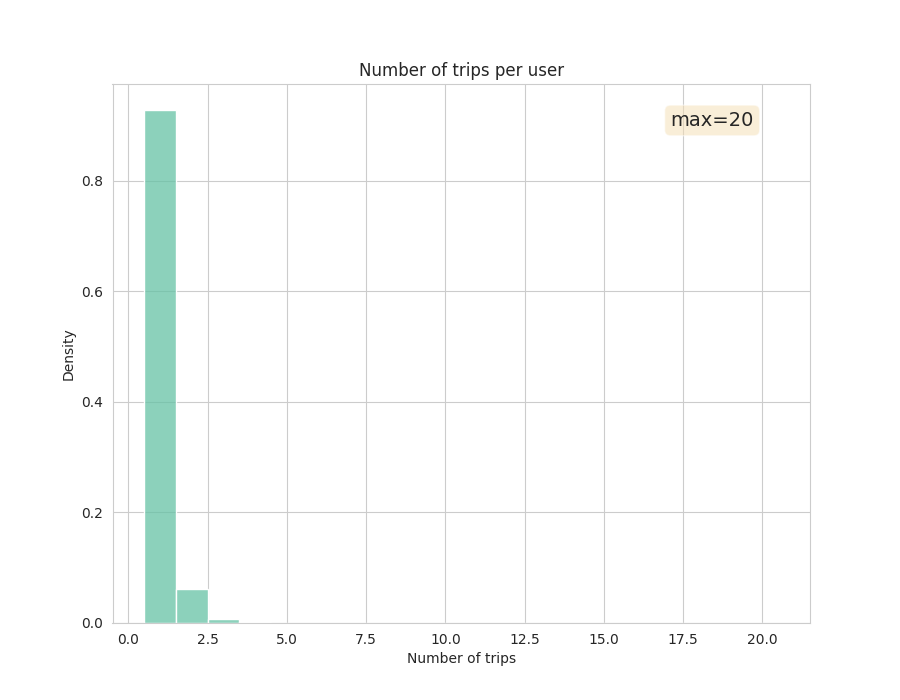

In [164]:
_, ax = plt.subplots(figsize=(9, 7))

# Get trips per user
trips_per_user = raw.groupby('user_id')['utrip_id'].nunique().values

# Plot
sns.histplot(trips_per_user, discrete=True, stat='density', ax=ax)

# Text box
text = f"max={trips_per_user.max()}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.80, 0.95, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set(title='Number of trips per user',
       xlabel='Number of trips');

# Trips

How many trips are in the dataset?

In [7]:
print(raw.utrip_id.nunique())

217686


How many cities per trip? 

<IPython.core.display.Javascript object>


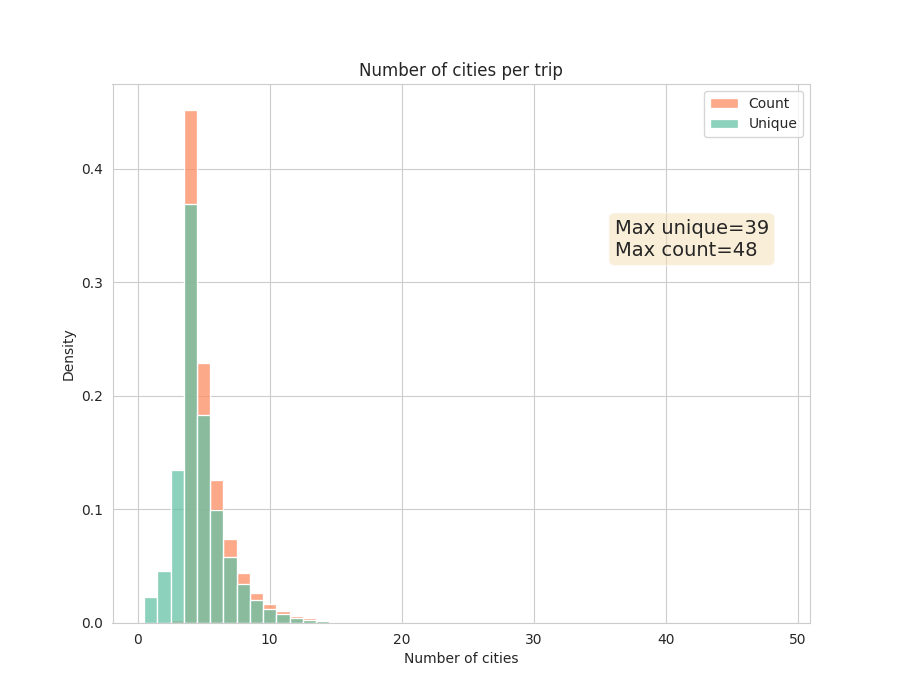

In [167]:
_, ax = plt.subplots(figsize=(9, 7))

# Get cities per trip
cities_per_trip = raw.groupby('utrip_id')['city_id'].nunique().values
cities_per_trip_count = raw.groupby('utrip_id')['city_id'].count().values

# Plot
sns.histplot(cities_per_trip_count, stat='density', discrete=True, ax=ax, label='Count', color=sns.color_palette()[1])
sns.histplot(cities_per_trip, stat='density', discrete=True, ax=ax, label='Unique')

# Text box
text = f"Max unique={cities_per_trip.max()}\nMax count={cities_per_trip_count.max()}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.72, 0.75, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set(title='Number of cities per trip',
       xlabel='Number of cities')

ax.legend();

How many countries per trip?

<IPython.core.display.Javascript object>


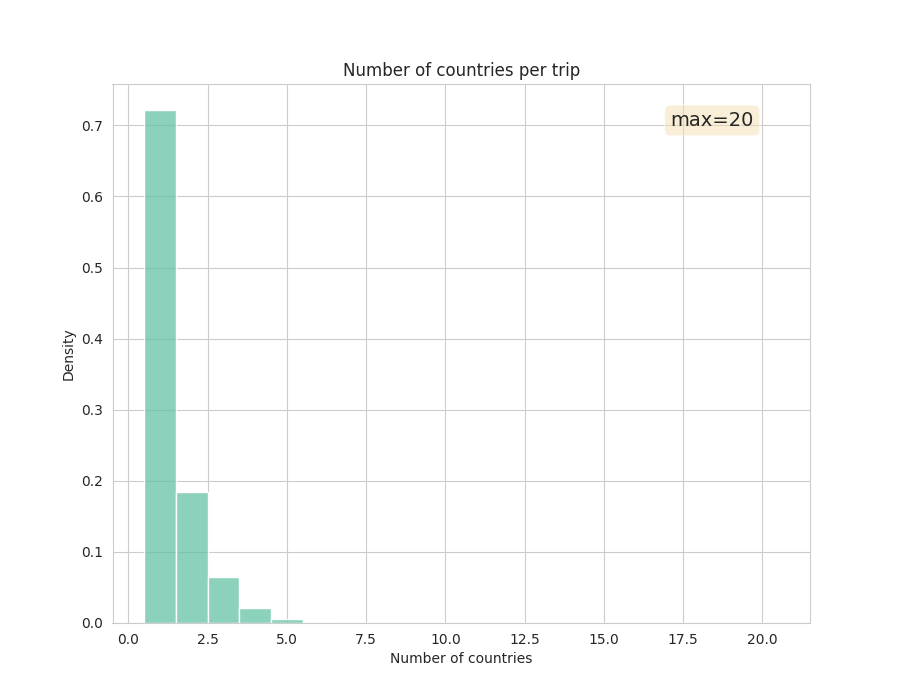

In [11]:
_, ax = plt.subplots(figsize=(9, 7))

# Get countries per trip
countries_per_trip = raw.groupby('utrip_id')['hotel_country'].nunique().values

# Plot
sns.histplot(countries_per_trip, stat='density', discrete=True, ax=ax)

# Text box
text = f"max={countries_per_trip.max()}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.80, 0.95, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set(title='Number of countries per trip',
       xlabel='Number of countries');

How many cities per country?

<IPython.core.display.Javascript object>


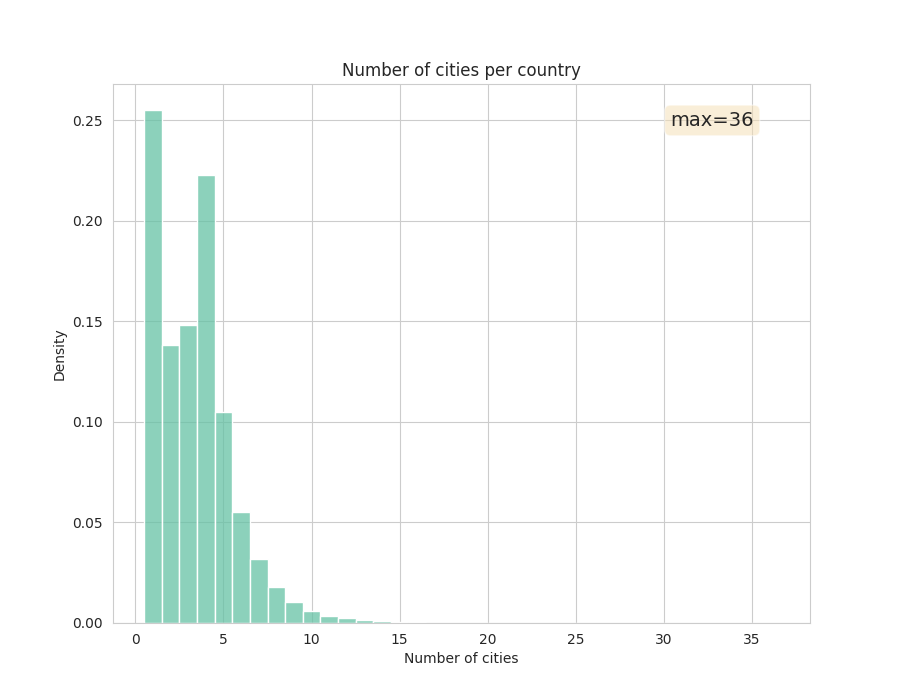

In [13]:
_, ax = plt.subplots(figsize=(9, 7))

# Get cities per country
cities_per_country = raw.groupby(['utrip_id', 'hotel_country'])['city_id'].nunique().values

# Plot
sns.histplot(cities_per_country, stat='density', discrete=True, ax=ax)

# Text box
text = f"max={cities_per_country.max()}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.80, 0.95, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set(title='Number of cities per country',
       xlabel='Number of cities');

# Time

How does the trips distribute across time?

<IPython.core.display.Javascript object>


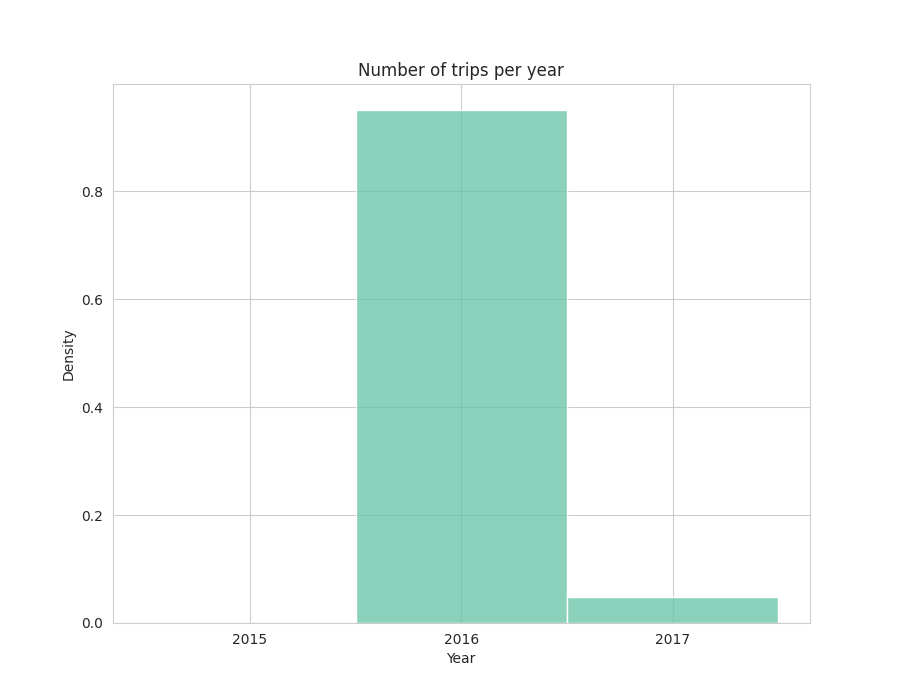

In [30]:
_, ax = plt.subplots(figsize=(9, 7))

# Get number of trips per year
trips_per_year = data[['checkin_year', 'utrip_id']].drop_duplicates()

# Plot
sns.histplot(trips_per_year['checkin_year'], stat='density', discrete=True, ax=ax)


ax.set_xticks([2015, 2016, 2017])
ax.set(title='Number of trips per year',
       xlabel='Year');

How does the trips distribute across week numbers?

<IPython.core.display.Javascript object>


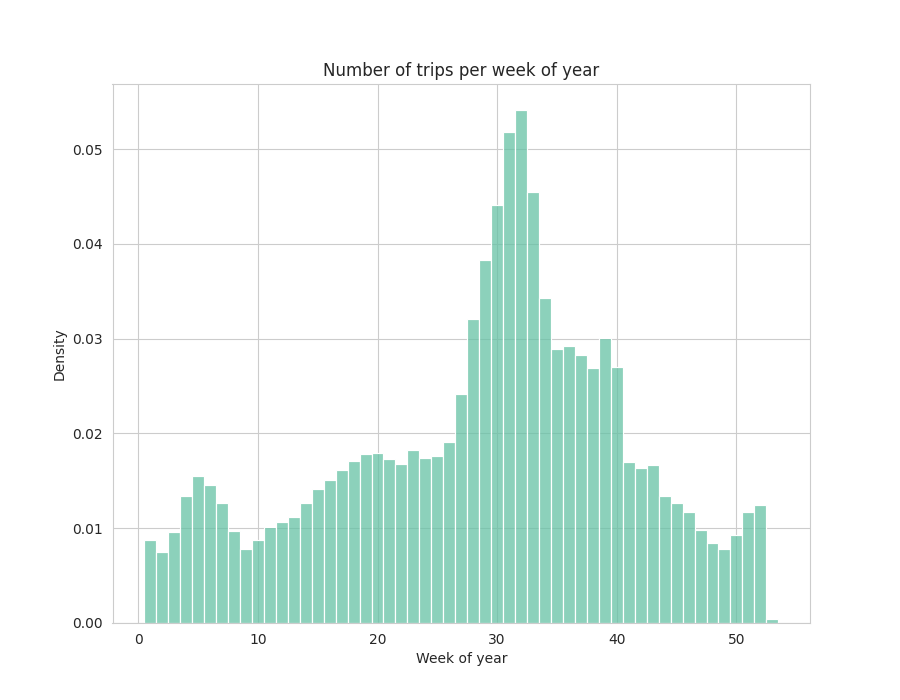

In [67]:
_, ax = plt.subplots(figsize=(9, 7))

# Get number of trips per year
trips_per_week_of_year = data[['checkin_week_of_year', 'utrip_id']].drop_duplicates()

# Plot
sns.histplot(trips_per_week_of_year['checkin_week_of_year'], stat='density', discrete=True, ax=ax)

ax.set(title='Number of trips per week of year',
       xlabel='Week of year');

What is the minimum and maximum dates in the data?

In [31]:
print(f"Minimum checkin date: {data['checkin'].min()}\nMaximum checkin date: {data['checkin'].max()}")

Minimum checkin date: 2015-12-31 00:00:00
Maximum checkin date: 2017-02-27 00:00:00


Number of trips per week, week number increasing from 2015 onwards

<IPython.core.display.Javascript object>


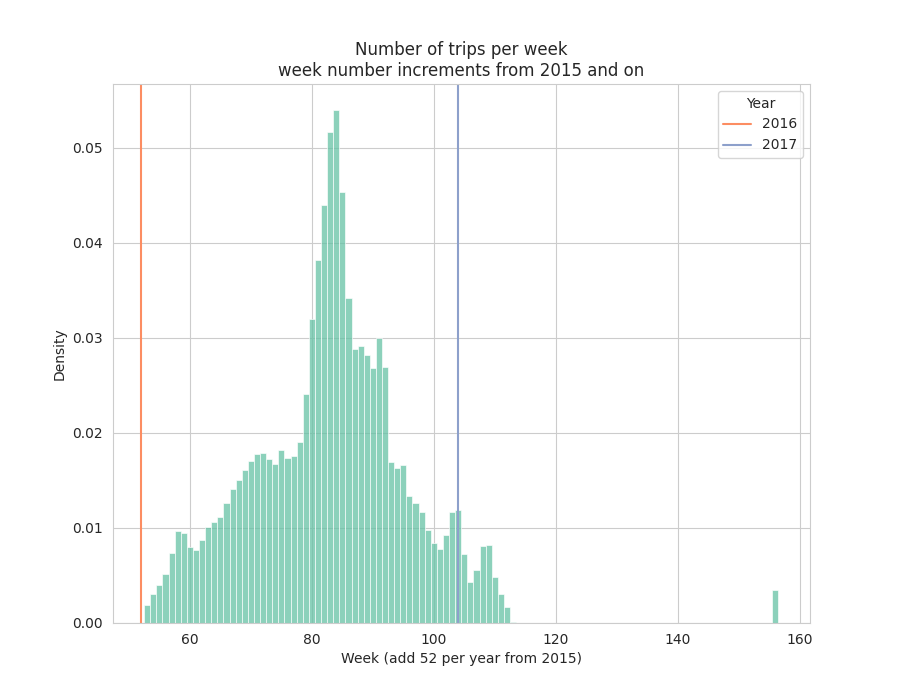

In [43]:
_, ax = plt.subplots(figsize=(9, 7))

# Get number of trips per week
trips_per_week = data[['checkin_year', 'checkin_week_of_year', 'utrip_id']].drop_duplicates()
trips_per_week['week'] = trips_per_week['checkin_week_of_year'] + ((trips_per_week['checkin_year'] - 2015) * 52)

# Plot
sns.histplot(trips_per_week['week'], stat='density', discrete=True, ax=ax)

ax.axvline(52, label=2016, color=sns.color_palette()[1])
ax.axvline(52 + 52, label=2017, color=sns.color_palette()[2])

ax.set(title='Number of trips per week\nweek number increments from 2015 and on',
       xlabel='Week (add 52 per year from 2015)')

ax.legend(title='Year');

Does the time effect the destination?

In [141]:
# Calculate ratios of checkins per city over time
city_checkins_over_time = data.groupby(['checkin_week_of_year', 'city_id'])['checkin'].count().reset_index()
city_checkins_over_time.columns = ['checkin_week_of_year', 'city_id', 'n_checkins']
city_checkins_over_time['city_total_checkins'] = city_checkins_over_time.groupby(['city_id'])['n_checkins'].transform('sum')
city_checkins_over_time['week_total_checkins'] = city_checkins_over_time.groupby(['checkin_week_of_year'])['n_checkins'].transform('sum')

# Ratio of city per week, denominator is the total checkins to the city
city_checkins_over_time['city_ratio'] = city_checkins_over_time['n_checkins'] / city_checkins_over_time['city_total_checkins']

# Ratio of city per week, denominator is the total checkins in that month
city_checkins_over_time['week_ratio'] = city_checkins_over_time['n_checkins'] / city_checkins_over_time['week_total_checkins']

In [142]:
city_checkins_over_time

,checkin_week_of_year,city_id,n_checkins,city_total_checkins,week_total_checkins,city_ratio,week_ratio
0,1,39,2,183,9740,0.010929,0.000205
1,1,55,15,1952,9740,0.007684,0.001540
2,1,64,2,6,9740,0.333333,0.000205
3,1,77,1,24,9740,0.041667,0.000103
4,1,115,2,77,9740,0.025974,0.000205
...,...,...,...,...,...,...,...
277149,53,65635,1,362,350,0.002762,0.002857
277150,53,65663,2,1023,350,0.001955,0.005714
277151,53,65872,1,25,350,0.040000,0.002857
277152,53,66972,1,17,350,0.058824,0.002857


<IPython.core.display.Javascript object>


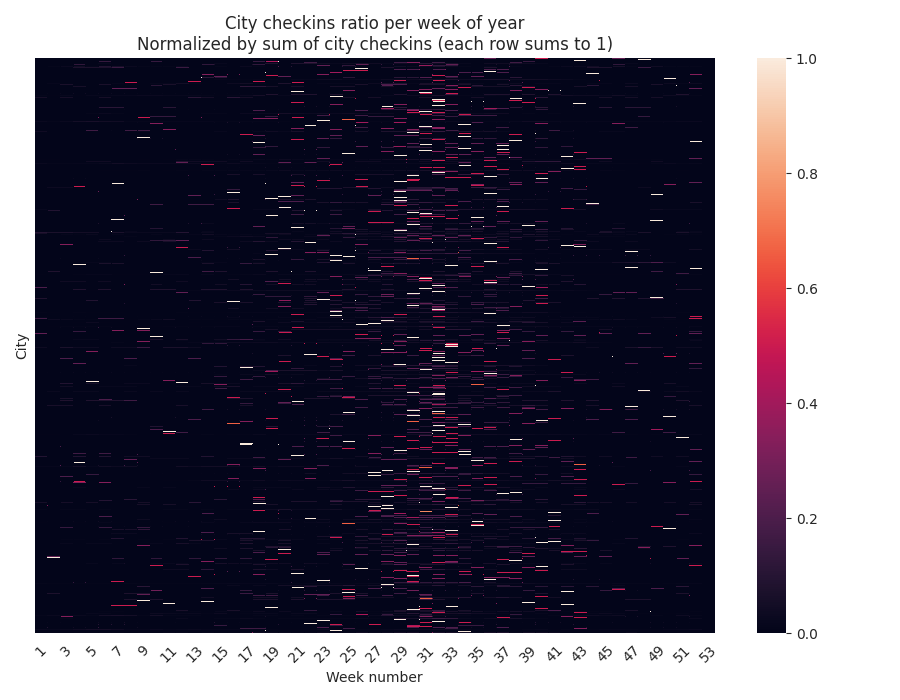

In [144]:
_, ax = plt.subplots(figsize=(9, 7))

display_df = city_checkins_over_time.pivot(index='city_id', columns='checkin_week_of_year')['city_ratio'].fillna(0)

# Check that all rows sum to 1 ()
assert np.isclose(display_df.sum(axis=1), 1).all() 

sns.heatmap(display_df, vmin=0, yticklabels=False, ax=ax)
ax.tick_params(axis='x', labelrotation=45)
ax.set(title='City checkins ratio per week of year\nNormalized by sum of city checkins (each row sums to 1)',
       xlabel='Week number', 
       ylabel='City')

plt.tight_layout();

<IPython.core.display.Javascript object>


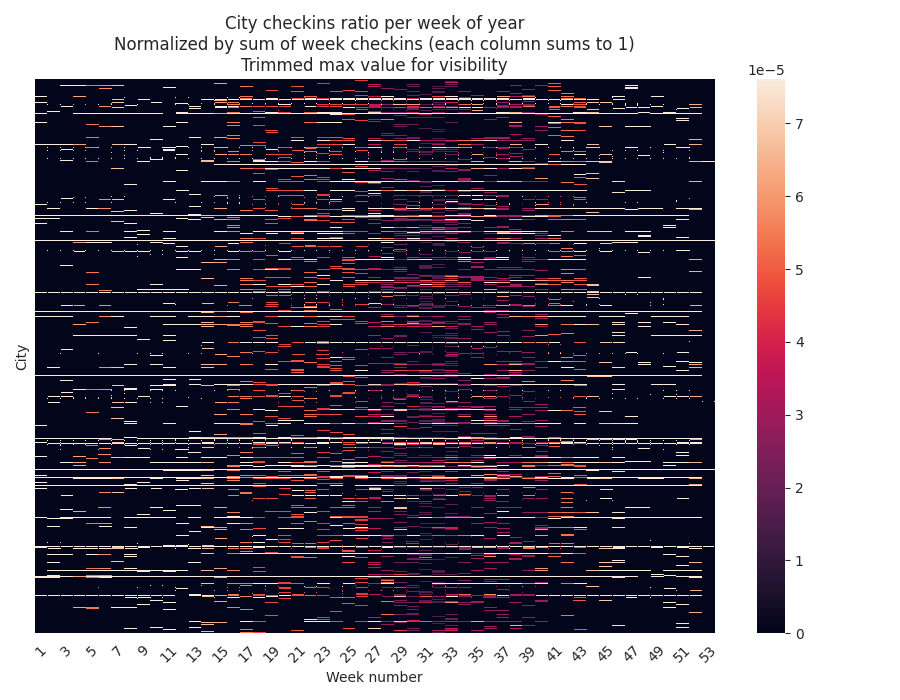

In [68]:
_, ax = plt.subplots(figsize=(9, 7))

display_df = city_checkins_over_time.pivot(index='city_id', columns='checkin_week_of_year')['week_ratio'].fillna(0)

# Check that all rows sum to 1 ()
assert np.isclose(display_df.sum(axis=0), 1).all() 

sns.heatmap(display_df, vmin=0, vmax=display_df.max().min()/100, yticklabels=False, ax=ax)
ax.tick_params(axis='x', labelrotation=45)
ax.set(title='City checkins ratio per week of year\nNormalized by sum of week checkins (each column sums to 1)\nTrimmed max value for visibility',
       xlabel='Week number', 
       ylabel='City')

plt.tight_layout();

# Locations

How many different cities?

In [6]:
print(raw.city_id.nunique())

39901


How many different hotel countries?

In [7]:
print(raw.hotel_country.nunique())

195


How many different booker countries?

In [8]:
print(raw.booker_country.nunique())

5


How does the checkins distribute among countries?

<IPython.core.display.Javascript object>


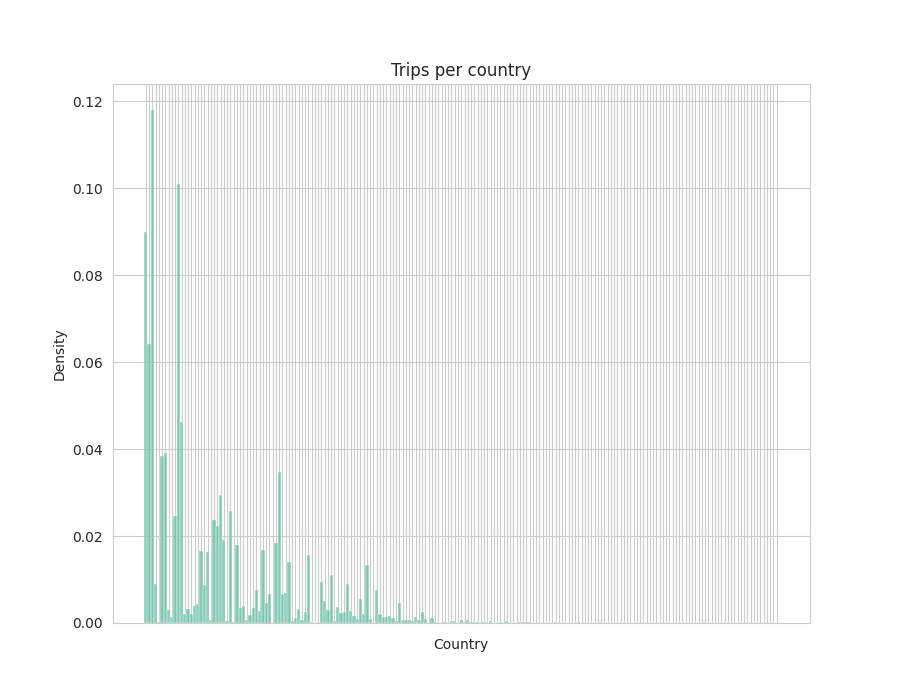

In [75]:
_, ax = plt.subplots(figsize=(9, 7))

# Plot
sns.histplot(raw['hotel_country'], stat='density', discrete=True, ax=ax)

ax.set_xticklabels([])
ax.set(title='Trips per country',
       xlabel='Country');

How does trips distribute per city?

<IPython.core.display.Javascript object>


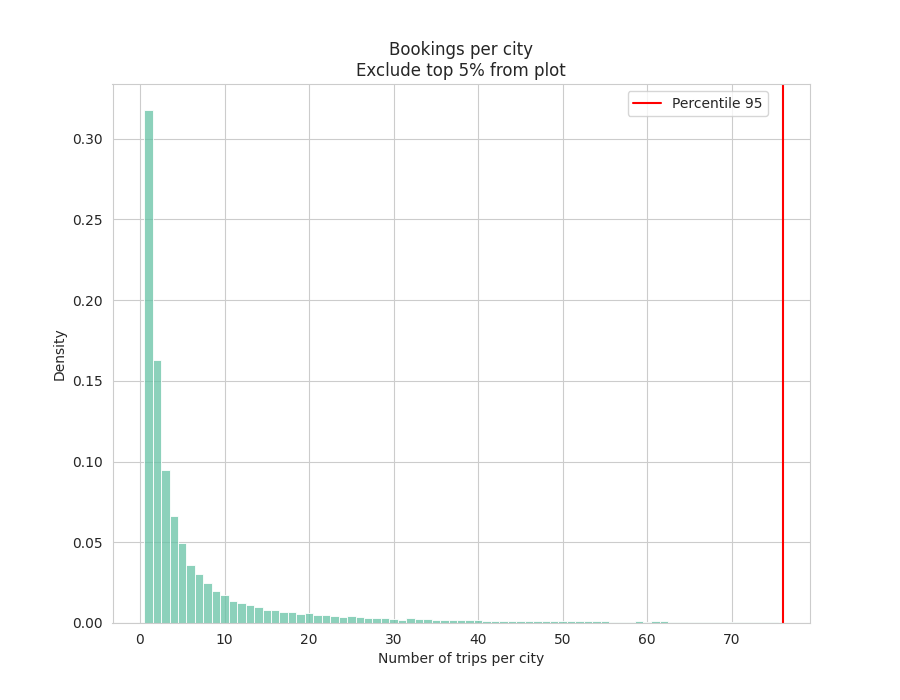

In [124]:
_, ax = plt.subplots(figsize=(9, 7))

# Plot
city_counts = raw['city_id'].value_counts()
percentile_95 = np.percentile(city_counts, 95)
sns.histplot(city_counts[city_counts < percentile_95], discrete=True, stat='density', ax=ax)

# Text box
ax.axvline(percentile_95, label='Percentile 95', color='red')

#ax.set_xticklabels([])
ax.set(title='Bookings per city\nExclude top 5% from plot',
       xlabel='Number of trips per city')
ax.legend(bbox_to_anchor=(0.95, 1));

Does the distribution of the final city depends on the booker country?

In [162]:
booker_final_city = raw.groupby('utrip_id')[['booker_country', 'city_id']].last().reset_index(drop=True)
booker_final_city = booker_final_city.groupby(['booker_country', 'city_id'])['city_id'].agg(['count']).reset_index()
booker_final_city['sum'] = booker_final_city.groupby('booker_country')['city_id'].transform('sum')
booker_final_city['ratio'] = booker_final_city['count'] / booker_final_city['sum']
booker_final_city = booker_final_city.pivot(index='booker_country', columns='city_id')['ratio'].fillna(0)

<IPython.core.display.Javascript object>


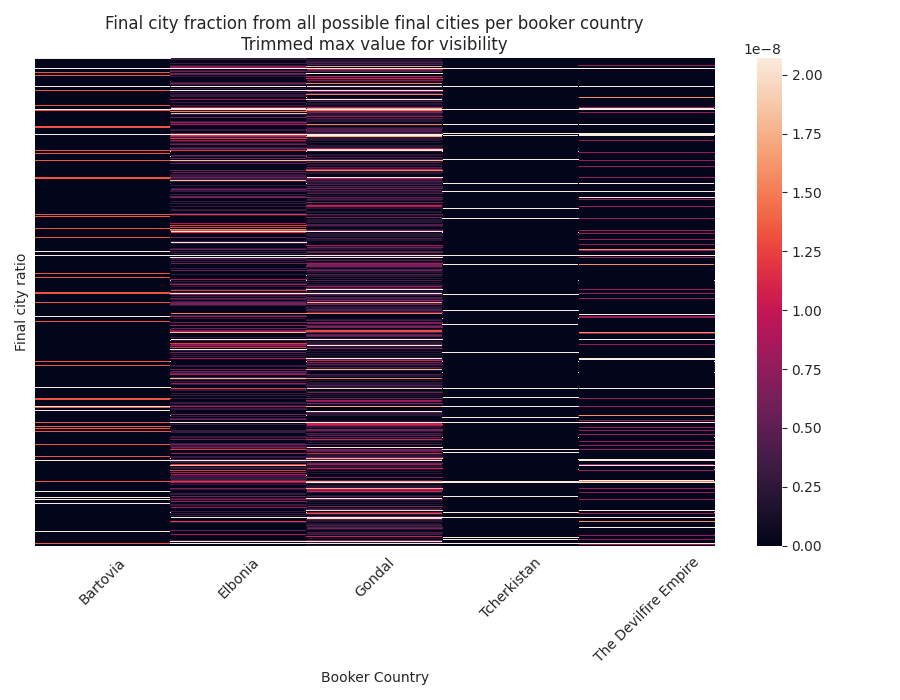

In [163]:
_, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(booker_final_city.T, vmin=0, vmax=booker_final_city.max().mean()/2, yticklabels=False, ax=ax)
ax.tick_params(axis='x', labelrotation=45)
ax.set(title='Final city fraction from all possible final cities per booker country\nTrimmed max value for visibility',
       xlabel='Booker Country', 
       ylabel='Final city ratio')

plt.tight_layout();

What is the transition probability between cities?

In [76]:
# Calculate transition probabilities between affiliates
city_trans_prob = raw.copy()
city_trans_prob['previous_city'] = city_trans_prob.groupby('utrip_id')['city_id'].shift()
city_trans_prob = city_trans_prob[['previous_city', 'city_id']]
city_trans_prob = city_trans_prob.dropna()
city_trans_prob['previous_city'] = city_trans_prob['previous_city'].astype(int)
city_trans_prob = city_trans_prob.groupby('previous_city')['city_id'].value_counts().to_frame()
city_trans_prob.columns = ['n_transitions']
city_trans_prob = city_trans_prob.reset_index()
city_trans_prob['total'] = city_trans_prob.groupby('previous_city')['n_transitions'].transform('sum')
city_trans_prob['transition_probability'] = city_trans_prob['n_transitions'] / city_trans_prob['total']

# Consider only cities taht appear more than 30 times
city_counts = city_trans_prob.previous_city.value_counts()
city_trans_prob_trimmed = city_trans_prob[(city_trans_prob.previous_city.isin(city_counts[city_counts >= 75].index)) & 
                                          (city_trans_prob.city_id.isin(city_counts[city_counts >= 75].index))]

<IPython.core.display.Javascript object>


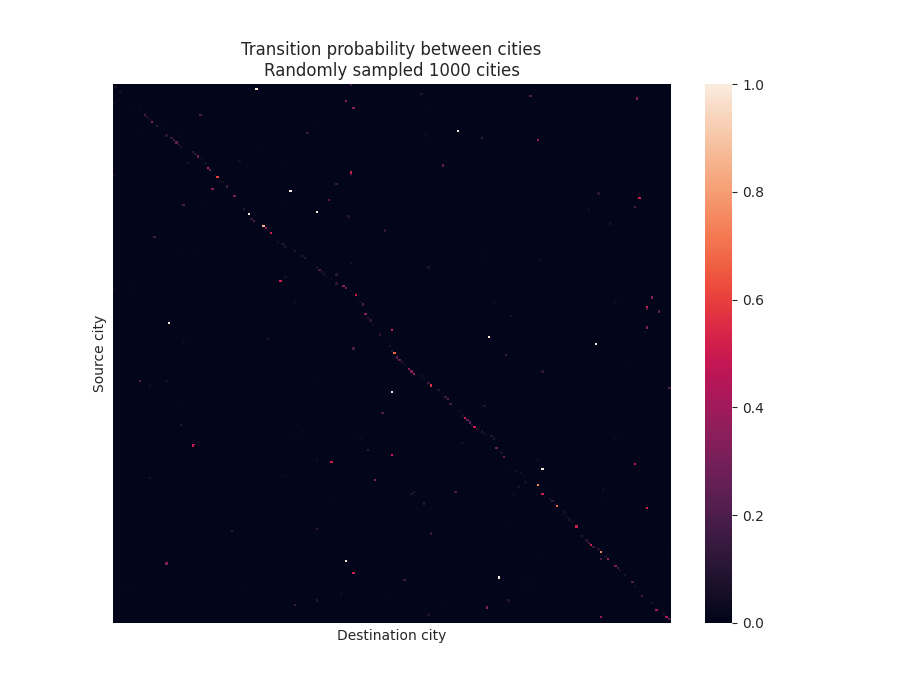

In [77]:
_, ax = plt.subplots(figsize=(9, 7))

# Sample randomly so we can plot
random_cities = np.random.choice(list(city_trans_prob.city_id.unique()), size=1000, replace=False)
sampled = city_trans_prob[(city_trans_prob['city_id'].isin(random_cities)) & (city_trans_prob['previous_city'].isin(random_cities))]
sns.heatmap(sampled.pivot(index='previous_city', columns='city_id')['transition_probability'].fillna(0), vmin=0, xticklabels=False, yticklabels=False, ax=ax)

ax.set(title='Transition probability between cities\nRandomly sampled 1000 cities',
       xlabel='Destination city',
       ylabel='Source city');

<IPython.core.display.Javascript object>


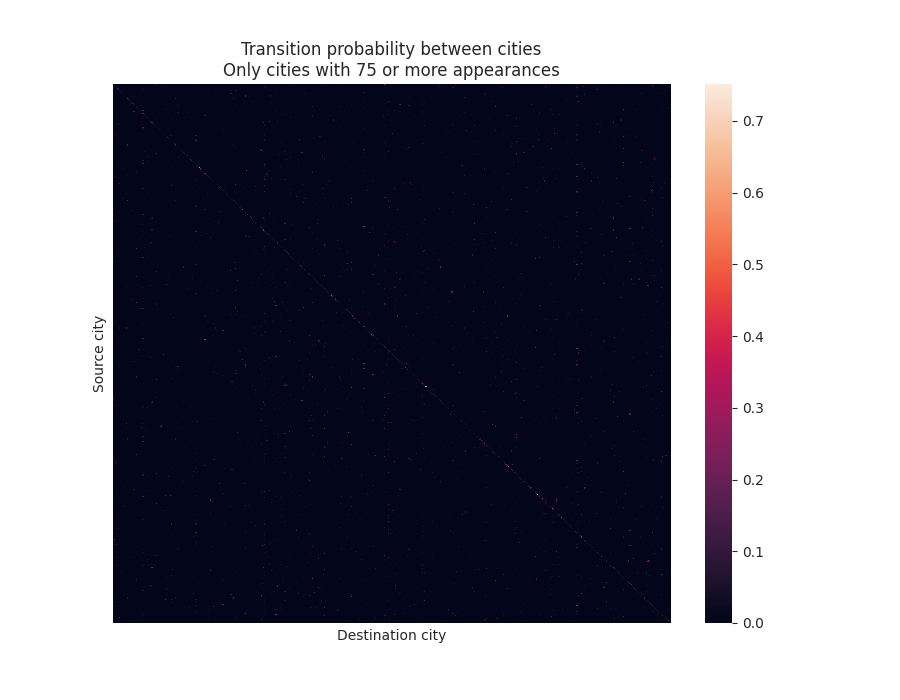

In [78]:
_, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(city_trans_prob_trimmed.pivot(index='previous_city', columns='city_id')['transition_probability'].fillna(0), vmin=0, xticklabels=False, yticklabels=False, ax=ax)

ax.set(title='Transition probability between cities\nOnly cities with 75 or more appearances',
       xlabel='Destination city',
       ylabel='Source city');

# Devices

How do the devices distribute?

<IPython.core.display.Javascript object>


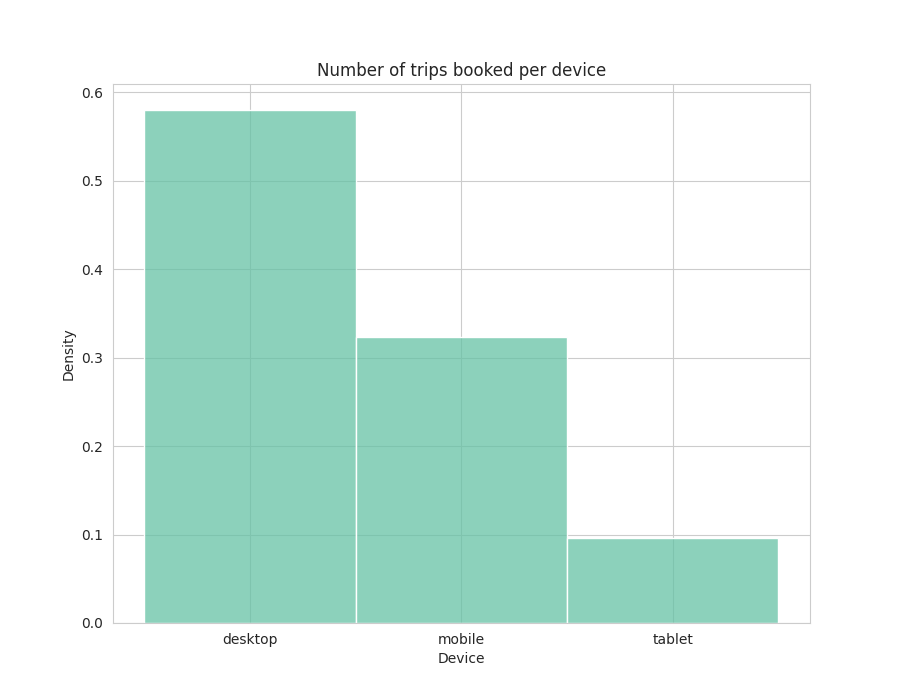

In [69]:
_, ax = plt.subplots(figsize=(9, 7))

# Count once per trip
devices = data[['device_class', 'utrip_id']].drop_duplicates()

# Plot
sns.histplot(devices['device_class'], stat='density', discrete=True, ax=ax)

ax.set(title='Number of trips booked per device',
       xlabel='Device');

Does the distribution of cities depend on the device?

In [153]:
# Calculate ratios of checkins per city over time
city_checkins_over_device = data.groupby(['device_class', 'city_id'])['checkin'].count().reset_index()
city_checkins_over_device.columns = ['device_class', 'city_id', 'n_checkins']
city_checkins_over_device['city_total_checkins'] = city_checkins_over_device.groupby(['city_id'])['n_checkins'].transform('sum')
city_checkins_over_device['device_total_checkins'] = city_checkins_over_device.groupby(['device_class'])['n_checkins'].transform('sum')

# Ratio of city per week, denominator is the total checkins to the city
city_checkins_over_device['city_ratio'] = city_checkins_over_device['n_checkins'] / city_checkins_over_device['city_total_checkins']

# Ratio of city per week, denominator is the total checkins in that month
city_checkins_over_device['device_ratio'] = city_checkins_over_device['n_checkins'] / city_checkins_over_device['device_total_checkins']

In [154]:
city_checkins_over_device

,device_class,city_id,n_checkins,city_total_checkins,device_total_checkins,city_ratio,device_ratio
0,desktop,4,1,1,753860,1.000000,0.000001
1,desktop,5,13,19,753860,0.684211,0.000017
2,desktop,6,7,8,753860,0.875000,0.000009
3,desktop,7,21,32,753860,0.656250,0.000028
4,desktop,8,2,2,753860,1.000000,0.000003
...,...,...,...,...,...,...,...
71092,tablet,67529,3,23,81119,0.130435,0.000037
71093,tablet,67536,14,128,81119,0.109375,0.000173
71094,tablet,67545,16,122,81119,0.131148,0.000197
71095,tablet,67552,1,8,81119,0.125000,0.000012


<IPython.core.display.Javascript object>


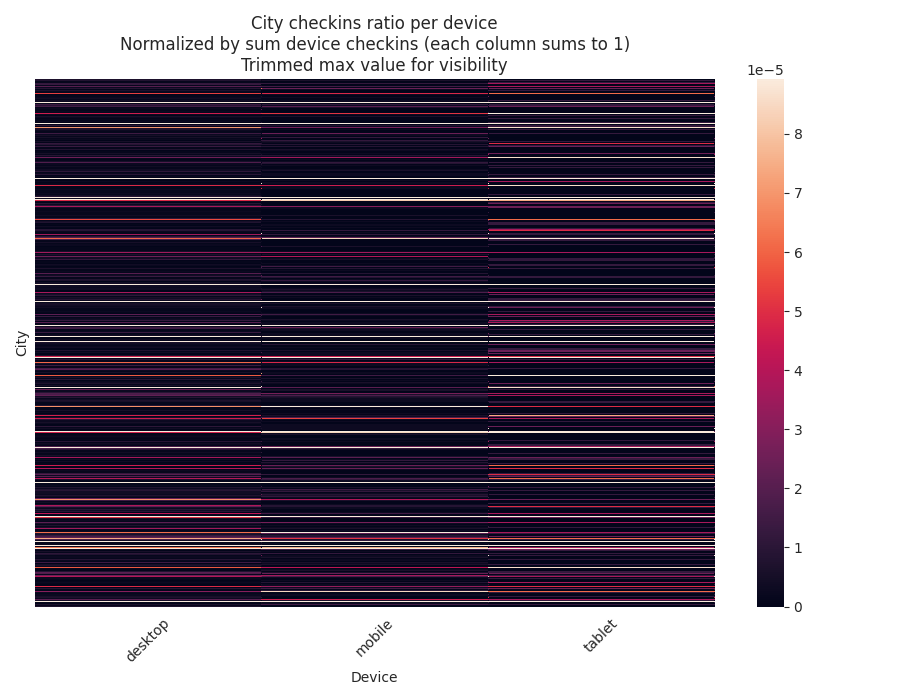

In [160]:
_, ax = plt.subplots(figsize=(9, 7))

display_df = city_checkins_over_device.pivot(index='city_id', columns='device_class')['device_ratio'].fillna(0)

# Check that all columns sum to 1
assert np.isclose(display_df.sum(axis=0), 1).all() 

sns.heatmap(display_df, vmin=0, vmax=display_df.max().min()/100, yticklabels=False, ax=ax)
ax.tick_params(axis='x', labelrotation=45)
ax.set(title='City checkins ratio per device\nNormalized by sum device checkins (each column sums to 1)\nTrimmed max value for visibility',
       xlabel='Device', 
       ylabel='City')

plt.tight_layout();

# Affiliates

How many affiliates are there?

In [10]:
print(raw.affiliate_id.nunique())

3254


How do the affiliates distribute?

<IPython.core.display.Javascript object>


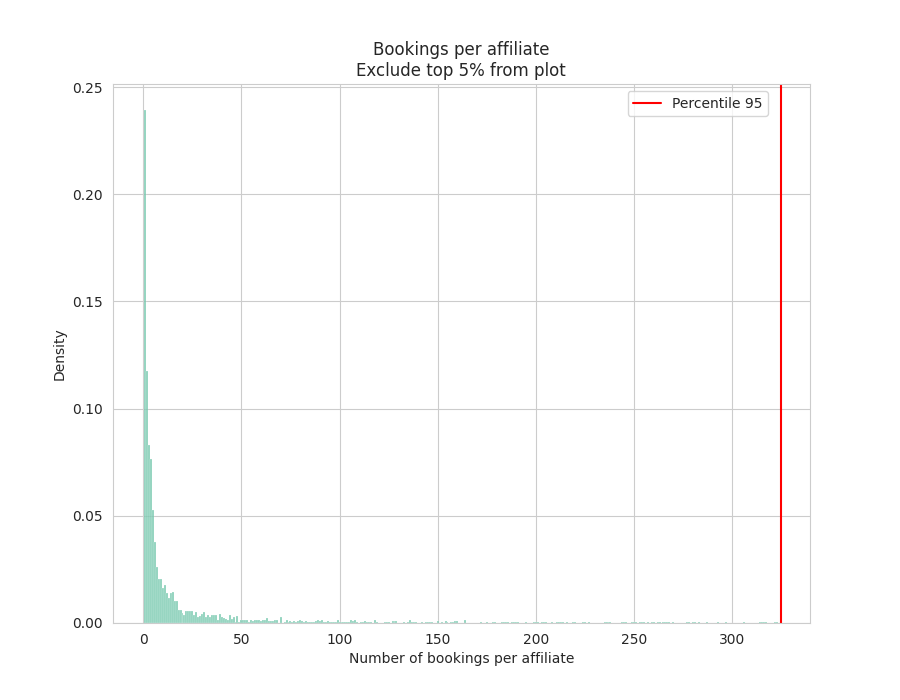

In [58]:
_, ax = plt.subplots(figsize=(9, 7))

# Plot
affiliate_counts = raw['affiliate_id'].value_counts()
percentile_95 = np.percentile(affiliate_counts, 95)
sns.histplot(affiliate_counts[affiliate_counts < percentile_95], discrete=True, stat='density', ax=ax)

# Text box
ax.axvline(percentile_95, label='Percentile 95', color='red')

#ax.set_xticklabels([])
ax.set(title='Bookings per affiliate\nExclude top 5% from plot',
       xlabel='Number of bookings per affiliate')
ax.legend(bbox_to_anchor=(0.95, 1));

How many unique cities per affiliate?

<IPython.core.display.Javascript object>


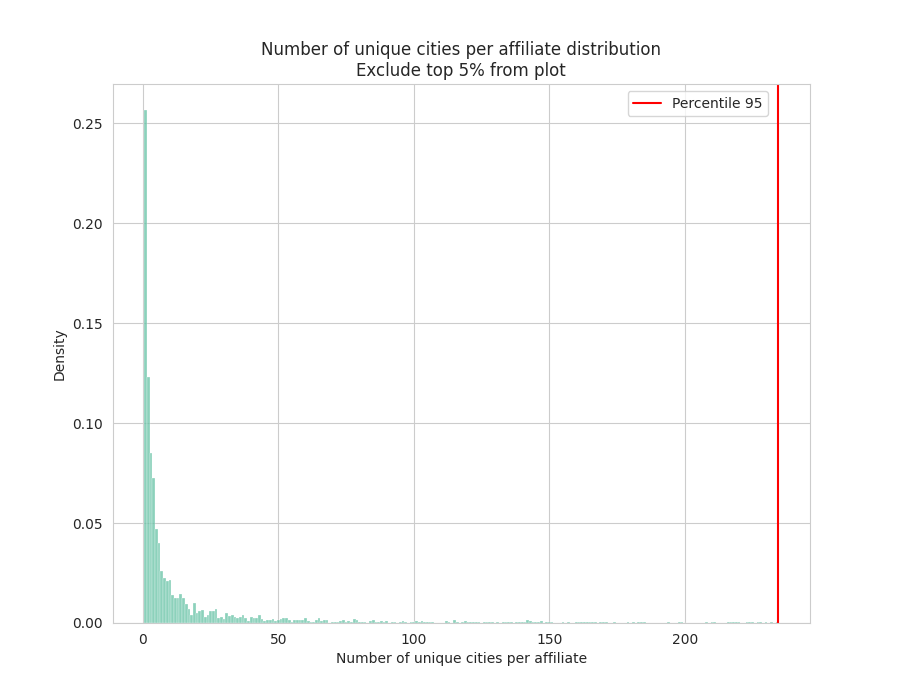

In [61]:
_, ax = plt.subplots(figsize=(9, 7))

# Plot
affiliate_unique_cities = raw.groupby('affiliate_id')['city_id'].nunique()
percentile_95 = np.percentile(affiliate_unique_cities, 95)
sns.histplot(affiliate_unique_cities[affiliate_unique_cities < percentile_95], discrete=True, stat='density', ax=ax)

# Text box
ax.axvline(percentile_95, label='Percentile 95', color='red')

ax.set(title='Number of unique cities per affiliate distribution\nExclude top 5% from plot',
       xlabel='Number of unique cities per affiliate')

ax.legend(bbox_to_anchor=(0.95, 1));

What are the transition probability between one affiliate to another?

In [17]:
# Calculate transition probabilities between affiliates
aff_trans_prob = raw.copy()
aff_trans_prob['previous_affiliate'] = aff_trans_prob.groupby('utrip_id')['affiliate_id'].shift()
aff_trans_prob = aff_trans_prob[['previous_affiliate', 'affiliate_id']]
aff_trans_prob = aff_trans_prob.dropna()
aff_trans_prob['previous_affiliate'] = aff_trans_prob['previous_affiliate'].astype(int)
aff_trans_prob = aff_trans_prob.groupby('previous_affiliate')['affiliate_id'].value_counts().to_frame()
aff_trans_prob.columns = ['n_transitions']
aff_trans_prob = aff_trans_prob.reset_index()
aff_trans_prob['total'] = aff_trans_prob.groupby('previous_affiliate')['n_transitions'].transform('sum')
aff_trans_prob['transition_probability'] = aff_trans_prob['n_transitions'] / aff_trans_prob['total']

<IPython.core.display.Javascript object>


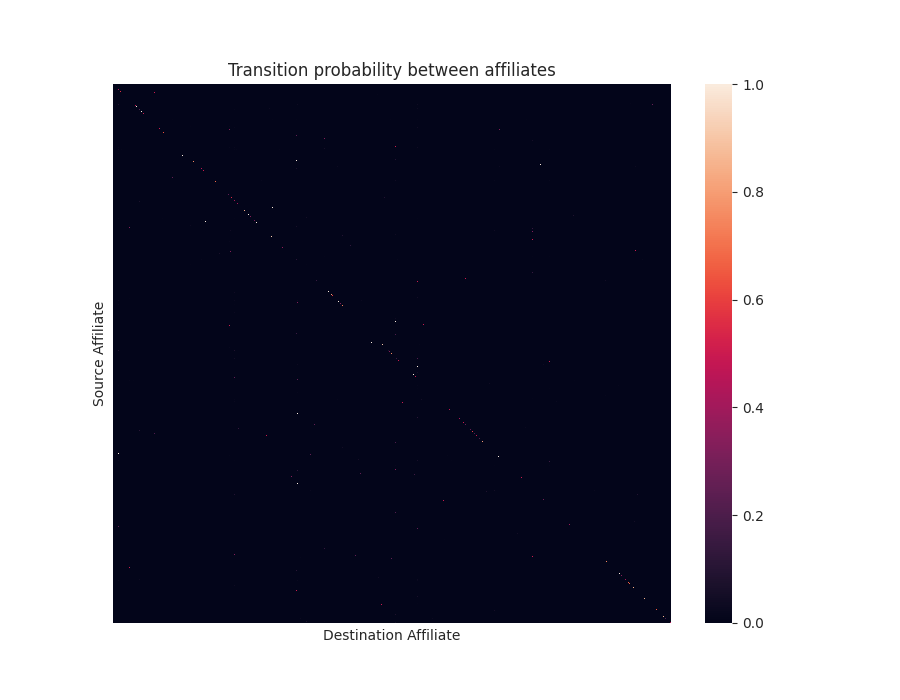

In [41]:
_, ax = plt.subplots(figsize=(9, 7))


sns.heatmap(aff_trans_prob.pivot(index='previous_affiliate', columns='affiliate_id')['transition_probability'].fillna(0), vmin=0, xticklabels=False, yticklabels=False, ax=ax)

ax.set(title='Transition probability between affiliates',
       xlabel='Destination Affiliate',
       ylabel='Source Affiliate');

What is the transition probability between affiliate and a city?

In [122]:
# Calculate transition probabilities between affiliates
city_aff_transition_prob = raw.copy()
city_aff_transition_prob['next_city'] = city_aff_transition_prob.groupby('utrip_id')['city_id'].shift(-1)
city_aff_transition_prob = city_aff_transition_prob[['affiliate_id', 'next_city']]
city_aff_transition_prob = city_aff_transition_prob.dropna()
city_aff_transition_prob['next_city'] = city_aff_transition_prob['next_city'].astype(int)
city_aff_transition_prob = city_aff_transition_prob.groupby('affiliate_id')['next_city'].value_counts().to_frame()
city_aff_transition_prob.columns = ['n_transitions']
city_aff_transition_prob = city_aff_transition_prob.reset_index()
city_aff_transition_prob['total'] = city_aff_transition_prob.groupby('affiliate_id')['n_transitions'].transform('sum')
city_aff_transition_prob['transition_probability'] = city_aff_transition_prob['n_transitions'] / city_aff_transition_prob['total']

<IPython.core.display.Javascript object>


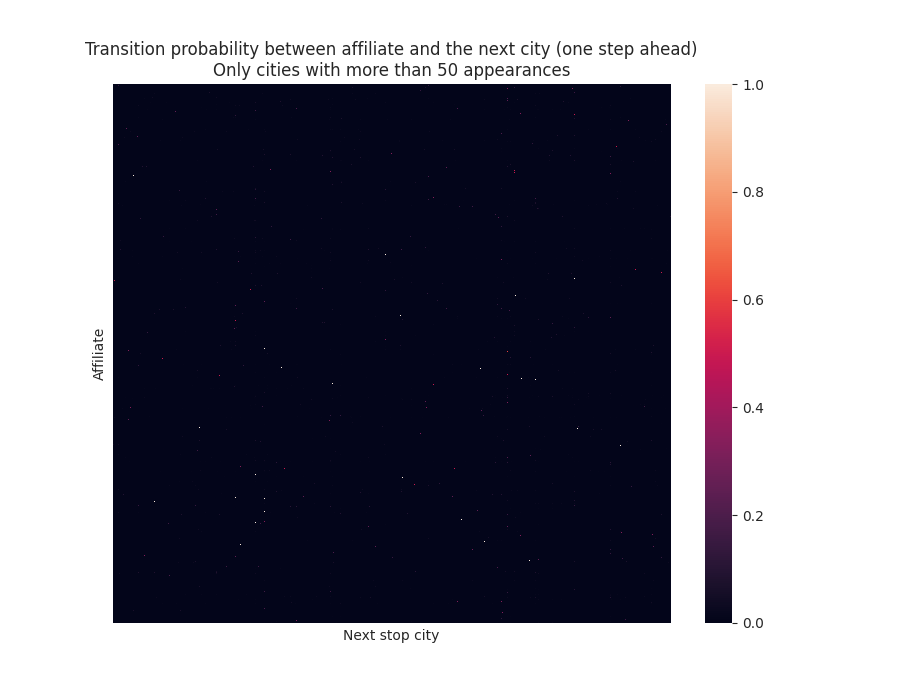

In [123]:
_, ax = plt.subplots(figsize=(9, 7))


# Filter for cities with too little data
city_counts = raw.city_id.value_counts()
city_aff_transition_prob = city_aff_transition_prob[city_aff_transition_prob.next_city.isin(city_counts[city_counts > 50].index)]

sns.heatmap(city_aff_transition_prob.pivot(index='affiliate_id', columns='next_city')['transition_probability'].fillna(0), vmin=0, xticklabels=False, yticklabels=False, ax=ax)

ax.set(title='Transition probability between affiliate and the next city (one step ahead)\nOnly cities with more than 50 appearances',
       xlabel='Next stop city',
       ylabel='Affiliate');